In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import warnings
import gdown

warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

train_id = "1oLZ8ThjyPW6DQLswbkH39NwThzBCzql6"
test_id = "1fCMpT5c7evhyiqSDUroBQJrgWIMga5tH"
gender_id = "1NXuoZZzzzO7q2iFB90RUTjrHfSngV6g-"

gdown.download(f"https://drive.google.com/uc?id={train_id}", "train.csv", quiet=False)
gdown.download(f"https://drive.google.com/uc?id={test_id}", "test.csv", quiet=False)
gdown.download(f"https://drive.google.com/uc?id={gender_id}", "gender_submission.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1oLZ8ThjyPW6DQLswbkH39NwThzBCzql6
To: /content/train.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 41.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fCMpT5c7evhyiqSDUroBQJrgWIMga5tH
To: /content/test.csv
100%|██████████| 28.6k/28.6k [00:00<00:00, 36.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NXuoZZzzzO7q2iFB90RUTjrHfSngV6g-
To: /content/gender_submission.csv
100%|██████████| 3.26k/3.26k [00:00<00:00, 4.53MB/s]


'gender_submission.csv'


LOAD DATASET
Rows: 891 | Columns: 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S



SCHEMA & DATA TYPES
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

MISSING VALUES OVERVIEW


,Missing,Missing_%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22



DESCRIPTIVE STATISTICS (NUMERIC)


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292



TARGET (SURVIVED) DISTRIBUTION
Survival rate: 38.38%  (0 = Died, 1 = Survived)


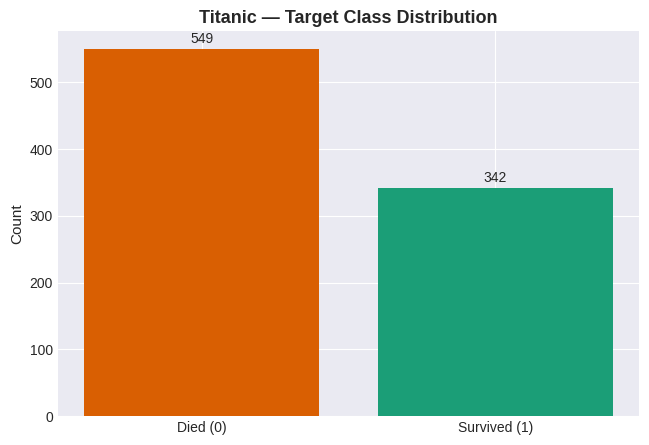


SURVIVAL RATE BY SEX


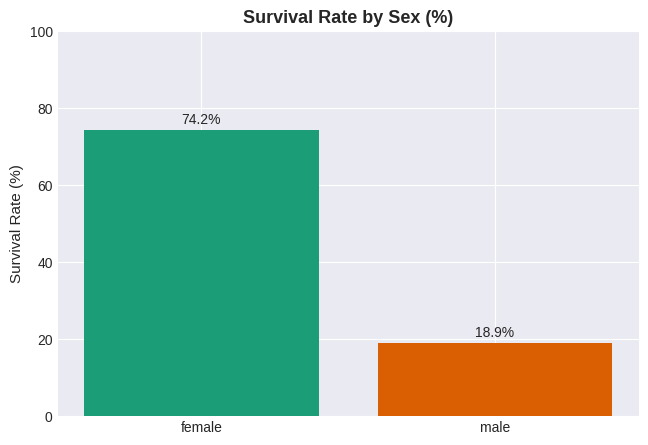


SURVIVAL RATE BY TICKET CLASS (PCLASS)


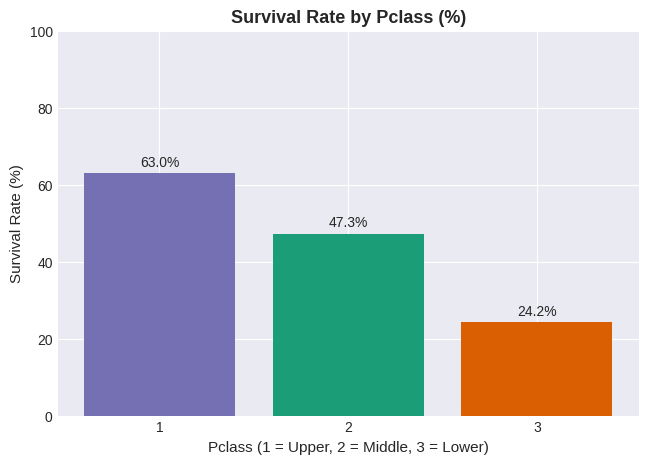


STEP 01 COMPLETE
Dataset loaded, inspected, and key target patterns visualized.


In [24]:
# ============================
# STEP 01 — DATA INTAKE & SANITY CHECKS
# ============================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import gdown


def section(title):
    print("\n" + "="*90)
    print(f"{title}".upper())
    print("="*90)

plt.rcParams.update({
    "figure.figsize": (7.5, 5),
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.titleweight": "bold",
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})
PALETTE = {
    "primary":  "#1b9e77",
    "accent":   "#d95f02",
    "neutral":  "#7570b3",
    "muted":    "#e7298a"
}

TRAIN_ID  = "1oLZ8ThjyPW6DQLswbkH39NwThzBCzql6"
TEST_ID   = "1fCMpT5c7evhyiqSDUroBQJrgWIMga5tH"
GENDER_ID = "1NXuoZZzzzO7q2iFB90RUTjrHfSngV6g-"

if not os.path.exists("train.csv"):
    gdown.download(f"https://drive.google.com/uc?id={TRAIN_ID}", "train.csv", quiet=False)
if not os.path.exists("test.csv"):
    gdown.download(f"https://drive.google.com/uc?id={TEST_ID}", "test.csv", quiet=False)
if not os.path.exists("gender_submission.csv"):
    gdown.download(f"https://drive.google.com/uc?id={GENDER_ID}", "gender_submission.csv", quiet=False)

section("Load Dataset")
df = pd.read_csv("train.csv")
print(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")
display(df.head(3))

section("Schema & Data Types")
print(df.dtypes)

section("Missing Values Overview")
missing = df.isna().sum().rename("Missing")
missing_pct = ((df.isna().sum()/len(df))*100).round(2).rename("Missing_%")
mv = pd.concat([missing, missing_pct], axis=1)
display(mv[mv["Missing"] > 0].sort_values("Missing", ascending=False))

section("Descriptive Statistics (Numeric)")
display(df.describe().T)

section("Target (Survived) Distribution")
surv_counts = df["Survived"].value_counts().sort_index()
surv_rate = df["Survived"].mean()
print(f"Survival rate: {surv_rate:.2%}  (0 = Died, 1 = Survived)")

fig = plt.figure()
values = surv_counts.values
labels = ["Died (0)", "Survived (1)"]
bars = plt.bar(labels, values, color=[PALETTE["accent"], PALETTE["primary"]])
plt.title("Titanic — Target Class Distribution")
plt.ylabel("Count")
for b in bars:
    height = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, height + 5, f"{int(height)}", ha="center", va="bottom", fontsize=10)
plt.show()

section("Survival Rate by Sex")
if {"Sex","Survived"}.issubset(df.columns):
    sex_rate = df.groupby("Sex")["Survived"].mean().sort_values(ascending=False)
    fig = plt.figure()
    bars = plt.bar(sex_rate.index.astype(str), (sex_rate.values*100), color=[PALETTE["primary"], PALETTE["accent"]])
    plt.title("Survival Rate by Sex (%)")
    plt.ylabel("Survival Rate (%)")
    for i, b in enumerate(bars):
        plt.text(b.get_x() + b.get_width()/2, b.get_height()+1, f"{sex_rate.values[i]*100:.1f}%",
                 ha="center", va="bottom", fontsize=10)
    plt.ylim(0, 100)
    plt.show()
else:
    print("Columns required not found: Sex, Survived")

section("Survival Rate by Ticket Class (Pclass)")
if {"Pclass","Survived"}.issubset(df.columns):
    pclass_rate = df.groupby("Pclass")["Survived"].mean().sort_index()
    fig = plt.figure()
    bars = plt.bar(pclass_rate.index.astype(str), (pclass_rate.values*100), color=[PALETTE["neutral"], PALETTE["primary"], PALETTE["accent"]])
    plt.title("Survival Rate by Pclass (%)")
    plt.xlabel("Pclass (1 = Upper, 2 = Middle, 3 = Lower)")
    plt.ylabel("Survival Rate (%)")
    for i, b in enumerate(bars):
        plt.text(b.get_x() + b.get_width()/2, b.get_height()+1, f"{pclass_rate.values[i]*100:.1f}%",
                 ha="center", va="bottom", fontsize=10)
    plt.ylim(0, 100)
    plt.show()
else:
    print("Columns required not found: Pclass, Survived")

section("Step 01 Complete")
print("Dataset loaded, inspected, and key target patterns visualized.")


 Loading Titanic Dataset...

 Training Set:  891 rows, 12 columns
 Test Set:      418 rows, 11 columns

 First 5 rows of Training Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



📑 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None


 Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


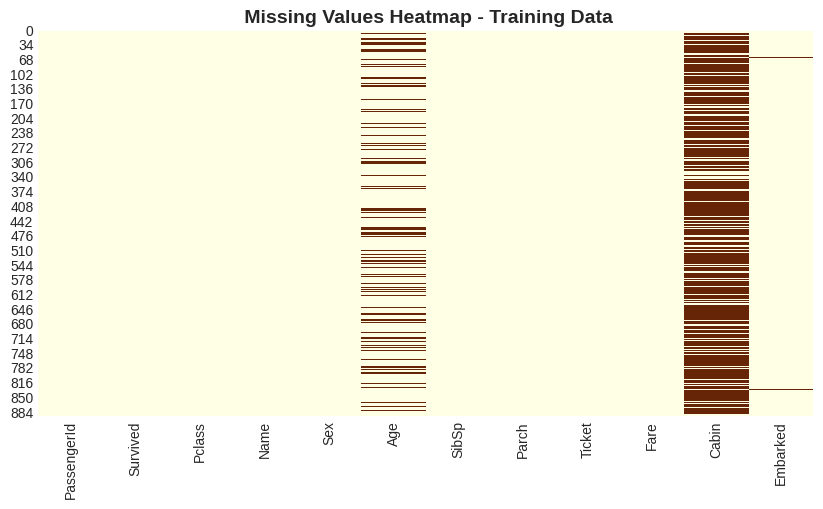


 Columns with Missing Values:


,0
Cabin,687
Age,177
Embarked,2


In [25]:
# ================================
# STEP 02: Load & Inspect Dataset
# ================================

print(" Loading Titanic Dataset...")

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_df = pd.read_csv("gender_submission.csv")

print("\n Training Set: ", train_df.shape[0], "rows,", train_df.shape[1], "columns")
print(" Test Set:     ", test_df.shape[0], "rows,", test_df.shape[1], "columns")

print("\n First 5 rows of Training Data:")
display(train_df.head())

print("\n📑 Data Info:")
display(train_df.info())

print("\n Summary Statistics:")
display(train_df.describe(include="all").T)

plt.figure(figsize=(10, 5))
sns.heatmap(train_df.isnull(), cbar=False, cmap="YlOrBr")
plt.title(" Missing Values Heatmap - Training Data", fontsize=14, weight='bold')
plt.show()

missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

if not missing_values.empty:
    print("\n Columns with Missing Values:")
    display(missing_values)
else:
    print("\n No Missing Values Found!")


In [26]:
# Step 02.1: Feature Overview (Categorical vs Numerical)

target_col = "Survived"

numerical_cols = train_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_cols.remove("PassengerId")
numerical_cols.remove(target_col)

categorical_cols = train_df.select_dtypes(include=["object"]).columns.tolist()

print(" Target Column:", target_col, "\n")
print(" Numerical Features:", numerical_cols, "\n")
print(" Categorical Features:", categorical_cols, "\n")

feature_summary = []

for col in train_df.columns:
    if col == target_col:
        col_type = "Target"
    elif col in numerical_cols:
        col_type = "Numerical"
    elif col in categorical_cols:
        col_type = "Categorical"
    elif col == "PassengerId":
        col_type = "Identifier"
    else:
        col_type = "Other"

    feature_summary.append({
        "Feature": col,
        "Type": col_type,
        "Missing Values": train_df[col].isna().sum(),
        "Unique Values": train_df[col].nunique(),
        "Example": train_df[col].dropna().iloc[0]
    })

feature_summary_df = pd.DataFrame(feature_summary)

print("\n Feature Summary Table:\n")
from IPython.display import display
display(feature_summary_df.style.background_gradient(cmap="Blues").set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt'), ('background-color', '#1f77b4'), ('color','white')]}]
).set_properties(**{'text-align': 'center'}))

section("Step 02 Complete")

 Target Column: Survived 

 Numerical Features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 

 Categorical Features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] 


 Feature Summary Table:



,Feature,Type,Missing Values,Unique Values,Example
0,PassengerId,Identifier,0,891,1
1,Survived,Target,0,2,0
2,Pclass,Numerical,0,3,3
3,Name,Categorical,0,891,"Braund, Mr. Owen Harris"
4,Sex,Categorical,0,2,male
5,Age,Numerical,177,88,22.000000
6,SibSp,Numerical,0,7,1
7,Parch,Numerical,0,7,0
8,Ticket,Categorical,0,681,A/5 21171
9,Fare,Numerical,0,248,7.250000



STEP 02 COMPLETE



DATASET RECAP
Train shape: (891, 12);  Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

TARGET DISTRIBUTION — SURVIVED (0/1)


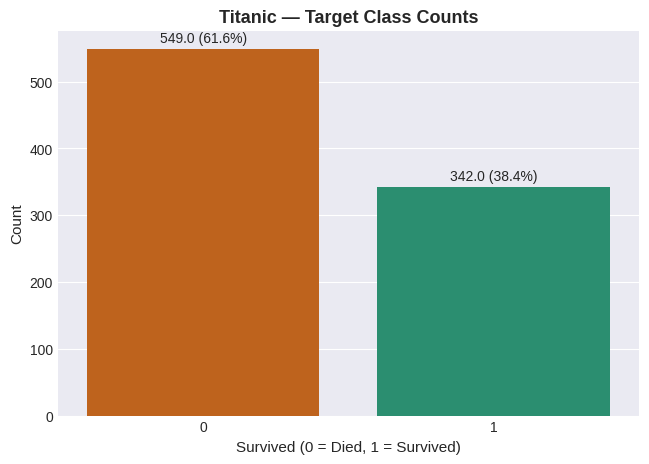


CATEGORICAL FEATURES — COUNTS


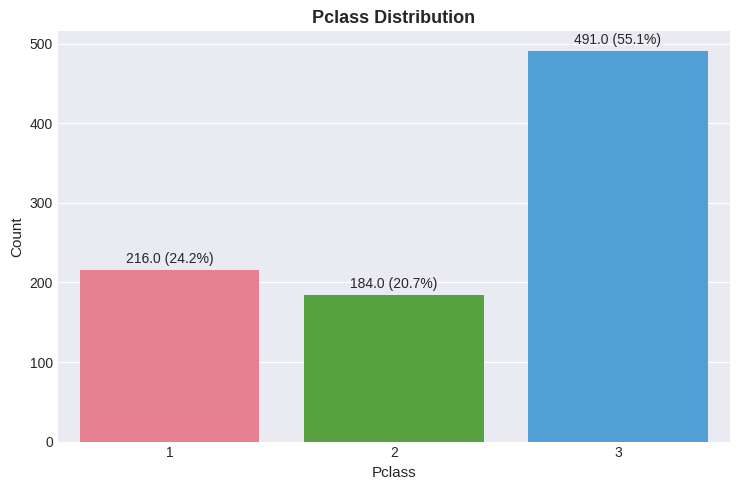

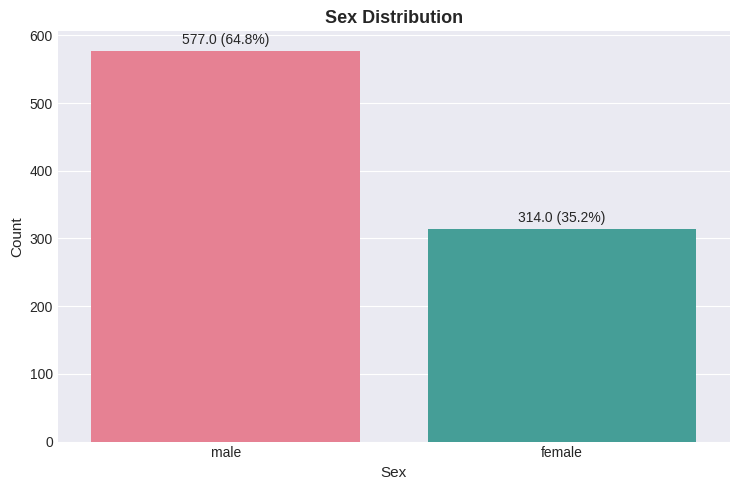

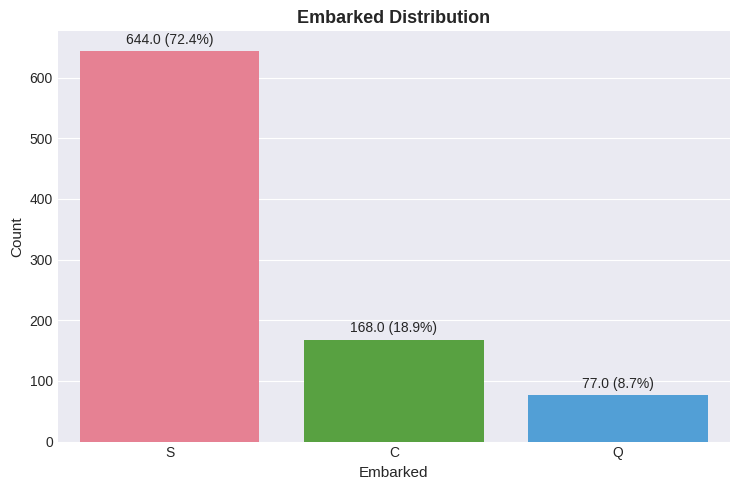

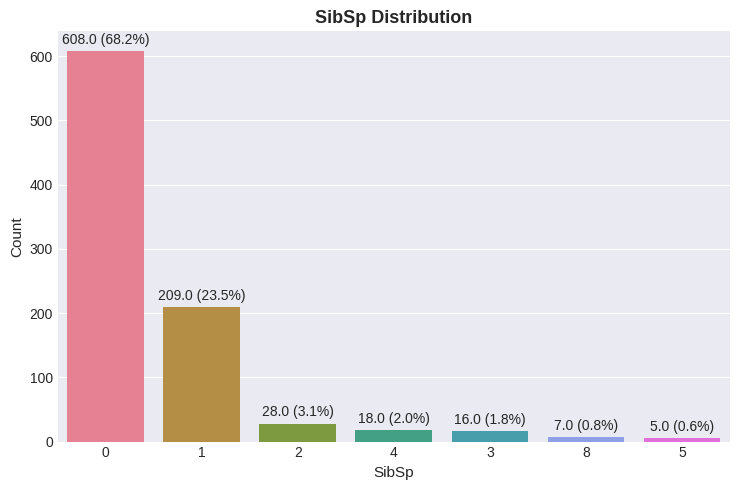

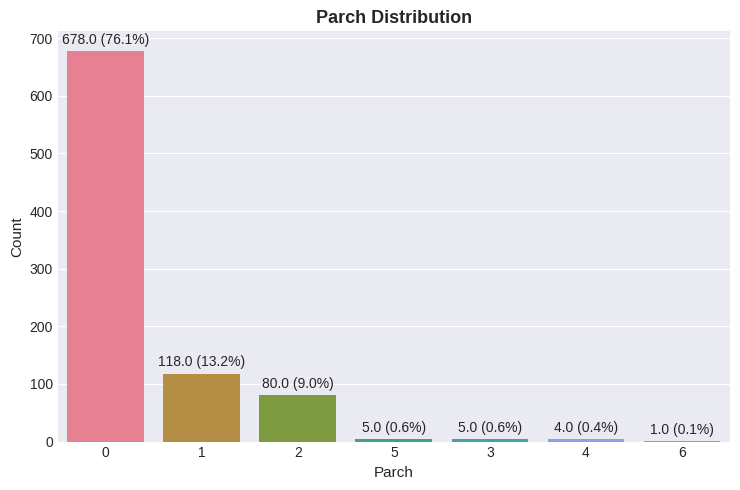


NUMERICAL FEATURES — DISTRIBUTIONS


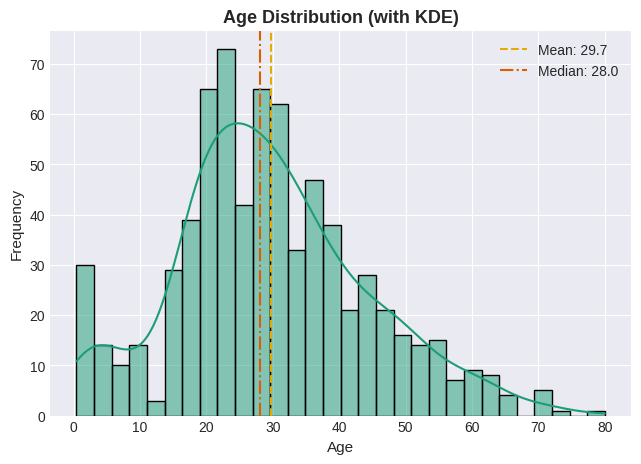

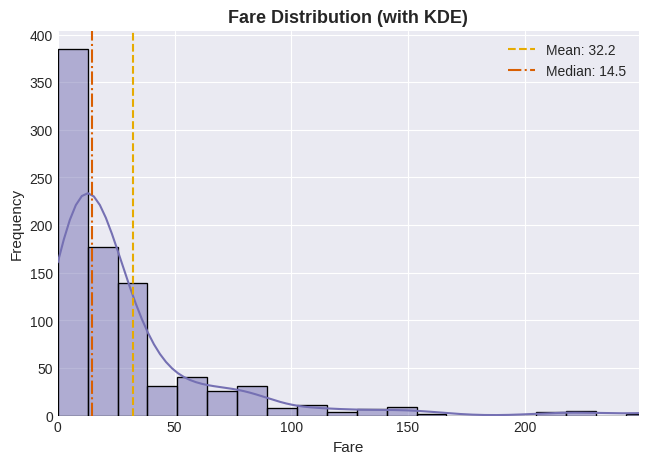


MISSING VALUES HEATMAP


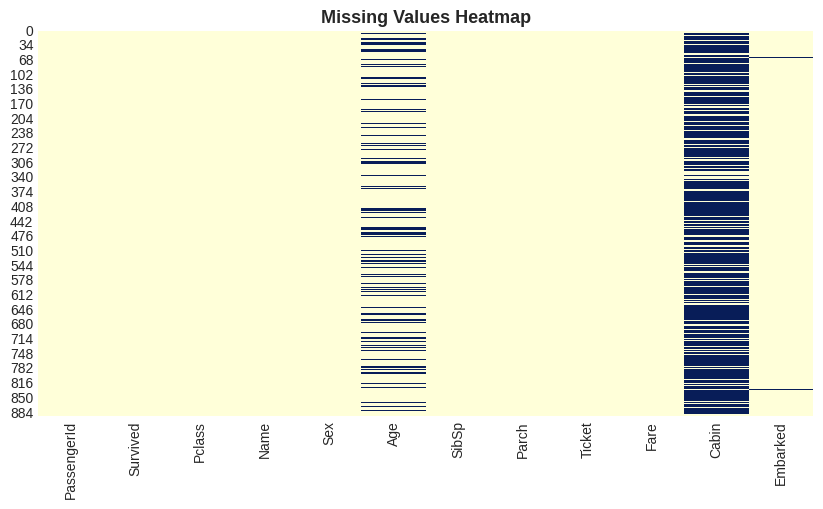


STEP 03.1 COMPLETE
Univariate (categorical, numerical, target, missing values) exploration done.


In [27]:
# ==========================================
# STEP 03.1 — EXPLORATORY DATA ANALYSIS
# Univariate Analysis (Categorical + Numerical + Missing Values)
# ==========================================

from IPython.display import display
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def section(title):
    print("\n" + "="*100)
    print(title.upper())
    print("="*100)

PALETTE = {
    "primary":  "#1b9e77",
    "accent":   "#d95f02",
    "neutral":  "#7570b3",
    "gold":     "#e6ab02",
    "pink":     "#e7298a",
    "grey":     "#6c757d"
}

def annotate_bars(ax, add_percent=False):
    total = sum([p.get_height() for p in ax.patches]) if add_percent else None
    for p in ax.patches:
        height = p.get_height()
        if add_percent and total:
            label = f"{height} ({height/total:.1%})"
        else:
            label = f"{int(height)}"
        ax.annotate(
            label,
            (p.get_x()+p.get_width()/2, height),
            ha="center", va="bottom", fontsize=10, xytext=(0,3), textcoords="offset points"
        )


section("Dataset Recap")
print(f"Train shape: {train_df.shape};  Columns: {list(train_df.columns)}")

section("Target distribution — Survived (0/1)")
fig = plt.figure(figsize=(7.5,5))
ax = sns.countplot(data=train_df, x="Survived", palette=[PALETTE["accent"], PALETTE["primary"]])
ax.set_title("Titanic — Target Class Counts", weight="bold")
ax.set_xlabel("Survived (0 = Died, 1 = Survived)")
ax.set_ylabel("Count")
annotate_bars(ax, add_percent=True)
plt.show()

section("Categorical features — counts")

categorical_cols = ["Pclass", "Sex", "Embarked", "SibSp", "Parch"]

for col in categorical_cols:
    plt.figure(figsize=(7.5,5))
    order = train_df[col].value_counts().index if col not in ["Pclass"] else [1,2,3]
    ax = sns.countplot(data=train_df, x=col, order=order, palette="husl")
    ax.set_title(f"{col} Distribution", weight="bold")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    annotate_bars(ax, add_percent=True)
    plt.tight_layout()
    plt.show()

# ---------------- Numerical Features ----------------
section("Numerical features — distributions")

# Age
fig = plt.figure(figsize=(7.5,5))
sns.histplot(train_df["Age"].dropna(), bins=30, kde=True, color=PALETTE["primary"])
plt.title("Age Distribution (with KDE)", weight="bold")
plt.xlabel("Age")
plt.ylabel("Frequency")
if train_df["Age"].notna().any():
    mean_age = train_df["Age"].mean()
    median_age = train_df["Age"].median()
    plt.axvline(mean_age, linestyle="--", color=PALETTE["gold"], label=f"Mean: {mean_age:.1f}")
    plt.axvline(median_age, linestyle="-.", color=PALETTE["accent"], label=f"Median: {median_age:.1f}")
    plt.legend()
plt.show()

# Fare
fig = plt.figure(figsize=(7.5,5))
sns.histplot(train_df["Fare"], bins=40, kde=True, color=PALETTE["neutral"])
plt.title("Fare Distribution (with KDE)", weight="bold")
plt.xlabel("Fare")
plt.ylabel("Frequency")
mean_fare = train_df["Fare"].mean()
median_fare = train_df["Fare"].median()
plt.axvline(mean_fare, linestyle="--", color=PALETTE["gold"], label=f"Mean: {mean_fare:.1f}")
plt.axvline(median_fare, linestyle="-.", color=PALETTE["accent"], label=f"Median: {median_fare:.1f}")
plt.xlim(0, np.percentile(train_df["Fare"], 99))  # trim extreme outliers
plt.legend()
plt.show()

# ---------------- Missing Values ----------------
section("Missing Values Heatmap")
plt.figure(figsize=(10,5))
sns.heatmap(train_df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap", weight="bold")
plt.show()

section("Step 03.1 complete")
print("Univariate (categorical, numerical, target, missing values) exploration done.")


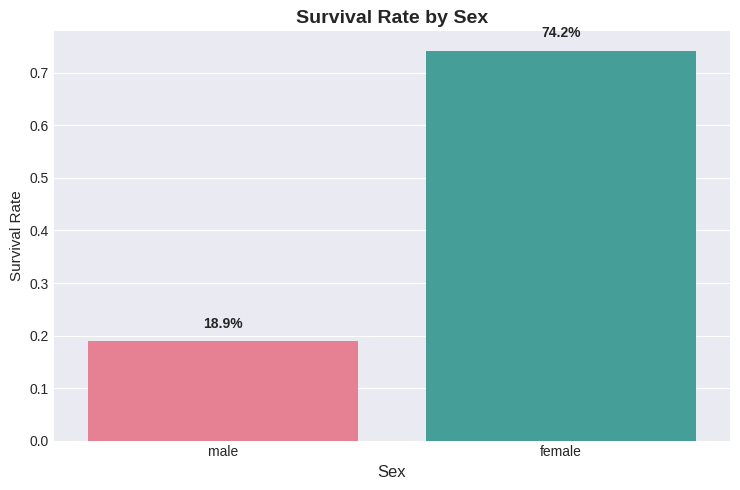

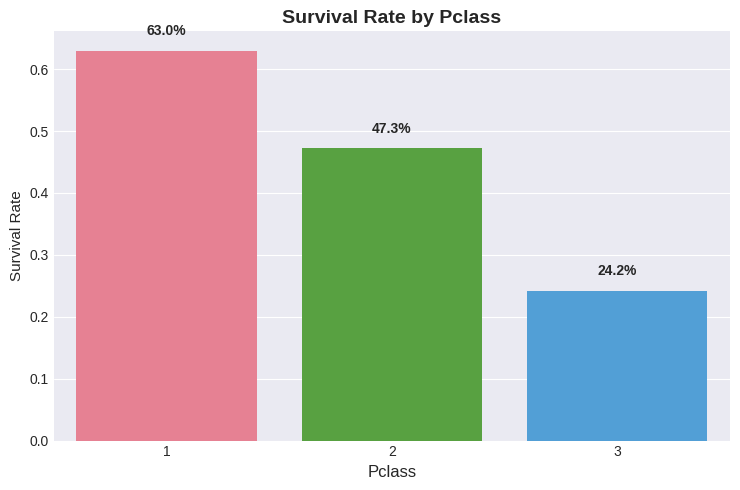

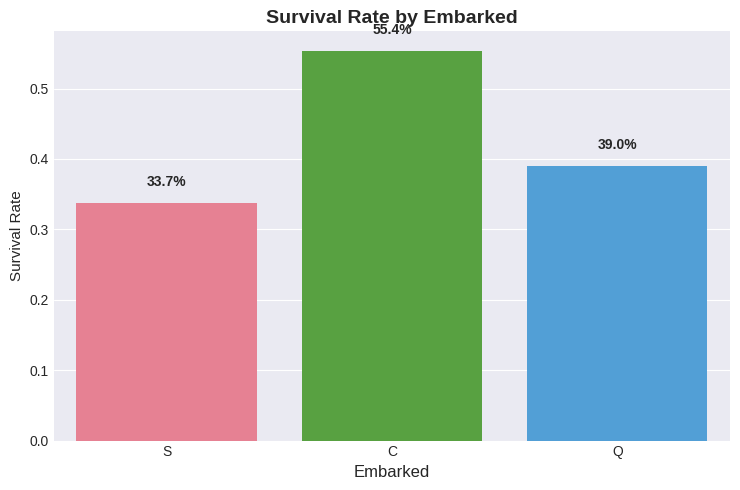

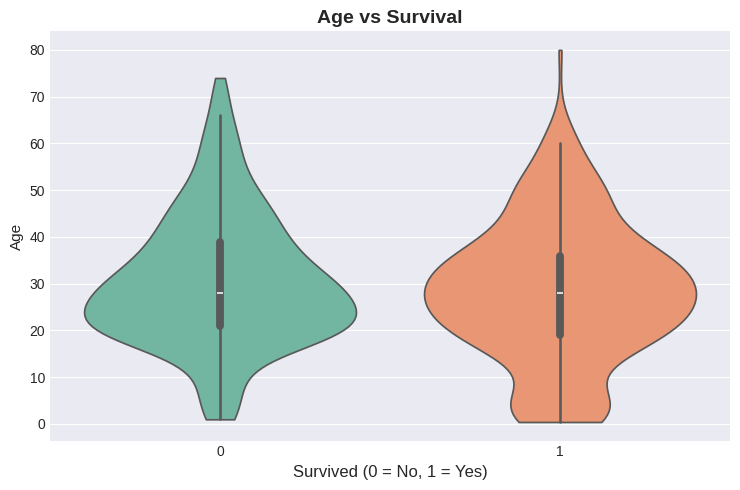

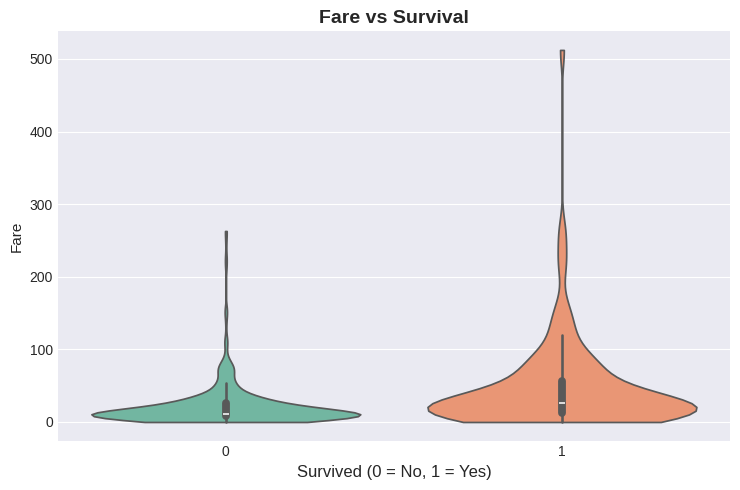

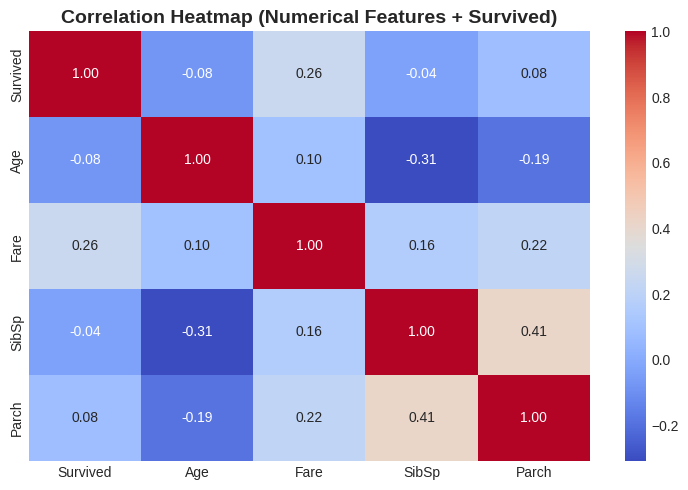


STEP 03.2 COMPLETE
Bivariate analysis (features vs target 'Survived') done.



In [28]:
# ==========================================
# STEP 03.2 — EXPLORATORY DATA ANALYSIS
# Bivariate Analysis (Feature vs Target "Survived")
# ==========================================


def annotate_bars(ax):
    """Annotate barplots with percentage values on top."""
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f"{height*100:.1f}%",
            (p.get_x() + p.get_width() / 2., height + 0.02),
            ha="center", va="bottom",
            fontsize=10, fontweight="bold"
        )

categorical_cols = ["Sex", "Pclass", "Embarked"]

for col in categorical_cols:
    plt.figure(figsize=(7.5, 5))
    ax = sns.barplot(
        data=train_df,
        x=col,
        y="Survived",
        palette="husl",
        errorbar=None
    )
    ax.set_title(f"Survival Rate by {col}", fontsize=14, fontweight="bold")
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Survival Rate")
    annotate_bars(ax)
    plt.tight_layout()
    plt.show()


num_cols = ["Age", "Fare"]

for col in num_cols:
    plt.figure(figsize=(7.5, 5))
    ax = sns.violinplot(
        data=train_df,
        x="Survived",
        y=col,
        palette="Set2",
        cut=0
    )
    ax.set_title(f"{col} vs Survival", fontsize=14, fontweight="bold")
    ax.set_xlabel("Survived (0 = No, 1 = Yes)", fontsize=12)
    ax.set_ylabel(col)
    plt.tight_layout()
    plt.show()


plt.figure(figsize=(7.5, 5))
sns.heatmap(
    train_df[["Survived", "Age", "Fare", "SibSp", "Parch"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap (Numerical Features + Survived)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

section("Step 03.2 complete")
print("Bivariate analysis (features vs target 'Survived') done.\n")


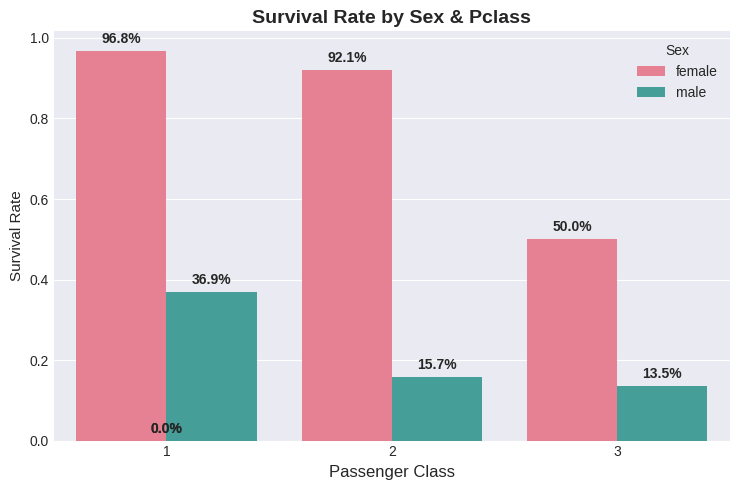

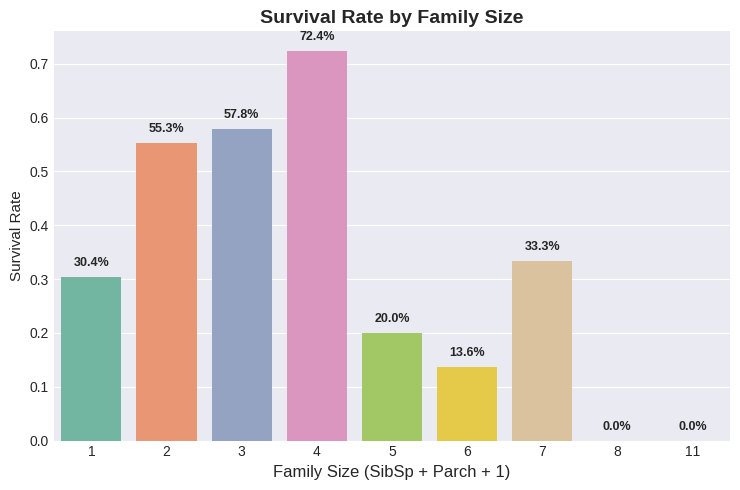

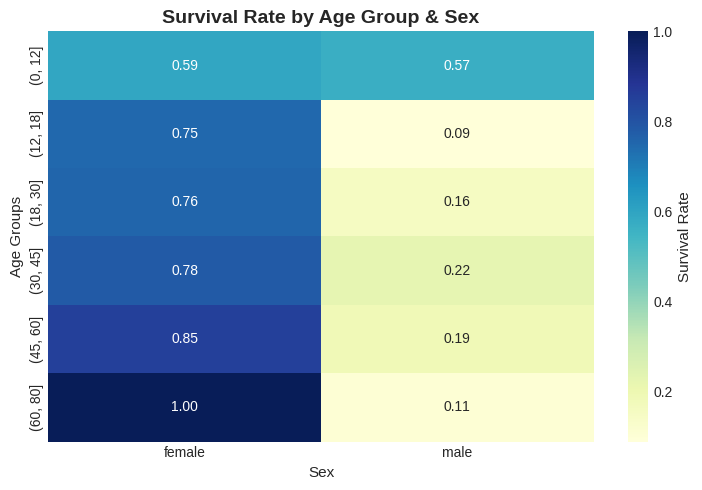


STEP 03.3 COMPLETE
Multivariate analysis (feature interactions) done.



In [29]:
# ==========================================
# STEP 03.3 — EXPLORATORY DATA ANALYSIS
# Multivariate Analysis
# ==========================================


plt.figure(figsize=(7.5, 5))
ax = sns.barplot(
    data=train_df,
    x="Pclass",
    y="Survived",
    hue="Sex",
    palette="husl",
    errorbar=None
)
ax.set_title("Survival Rate by Sex & Pclass", fontsize=14, fontweight="bold")
ax.set_xlabel("Passenger Class", fontsize=12)
ax.set_ylabel("Survival Rate")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height*100:.1f}%",
        (p.get_x() + p.get_width()/2, height + 0.02),
        ha="center", fontsize=10, fontweight="bold"
    )

plt.tight_layout()
plt.show()


train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1

plt.figure(figsize=(7.5, 5))
ax = sns.barplot(
    data=train_df,
    x="FamilySize",
    y="Survived",
    palette="Set2",
    errorbar=None
)
ax.set_title("Survival Rate by Family Size", fontsize=14, fontweight="bold")
ax.set_xlabel("Family Size (SibSp + Parch + 1)", fontsize=12)
ax.set_ylabel("Survival Rate")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height*100:.1f}%",
        (p.get_x() + p.get_width()/2, height + 0.02),
        ha="center", fontsize=9, fontweight="bold"
    )

plt.tight_layout()
plt.show()


age_bins = [0, 12, 18, 30, 45, 60, 80]
train_df["AgeBin"] = pd.cut(train_df["Age"], bins=age_bins)

pivot = train_df.pivot_table(
    values="Survived",
    index="AgeBin",
    columns="Sex",
    aggfunc="mean"
)

plt.figure(figsize=(7.5, 5))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar_kws={"label": "Survival Rate"}
)
plt.title("Survival Rate by Age Group & Sex", fontsize=14, fontweight="bold")
plt.xlabel("Sex")
plt.ylabel("Age Groups")

plt.tight_layout()
plt.show()

section("Step 03.3 complete")
print("Multivariate analysis (feature interactions) done.\n")


In [30]:
# ======================================================
# Step 04 – Feature Engineering & Preprocessing
# Goal: Convert raw Titanic data into model-ready features
# ======================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# -----------------------------
# 04.1 Handle Missing Values
# -----------------------------

# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)


# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


# Fill missing Fare with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)







In [31]:
# -----------------------------
# 04.2 Feature Engineering
# -----------------------------

# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# IsAlone Feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify rare titles
df['Title'] = df['Title'].replace(
    ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',
     'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})


In [32]:

# -----------------------------
# 4.3 Encoding Categorical Variables
# -----------------------------
# Encode Sex
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])   # Male=1, Female=0

# Encode Embarked (One-Hot)
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)

# Encode Title (One-Hot)
title_dummies = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, title_dummies], axis=1)

# Drop unused columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Title'], axis=1, inplace=True)


In [33]:
# -----------------------------
# 4.4 Scaling Numerical Features
# -----------------------------
scaler = StandardScaler()
df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age', 'Fare', 'FamilySize']])

# -----------------------------
# 4.5 Final Feature Matrix (X) & Target (y)
# -----------------------------
X = df.drop('Survived', axis=1)
y = df['Survived']

section("Step 04 complete")
print("Step 04 – Feature Engineering & Preprocessing completed.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


STEP 04 COMPLETE
Step 04 – Feature Engineering & Preprocessing completed.
Shape of X: (891, 16)
Shape of y: (891,)


In [34]:
# ==========================================
# STEP 05 – TRAIN/TEST SPLIT
# ==========================================

from sklearn.model_selection import train_test_split

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test set shape  (X_test, y_test):", X_test.shape, y_test.shape)

section("Step 05 complete")
print("Train/Test split done. Data is ready for modeling.\n")


Train set shape (X_train, y_train): (712, 16) (712,)
Test set shape  (X_test, y_test): (179, 16) (179,)

STEP 05 COMPLETE
Train/Test split done. Data is ready for modeling.



In [35]:
# ================================
# STEP 06 – Model Training
# ================================

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42)
}


results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # train
    y_pred = model.predict(X_test)  # predict

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"📌 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("="*50)


best_model_name = max(results, key=results.get)
section("Step 06 complete")
print(" Best model based on accuracy:", best_model_name, "with score:", results[best_model_name])


📌 Logistic Regression Accuracy: 0.8492
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.83      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179

📌 Decision Tree Accuracy: 0.8324
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       110
           1       0.79      0.77      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

📌 Random Forest Accuracy: 0.8324
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83


================ Baseline Model Evaluation ================


Logistic Regression Results
--------------------------------------------------
Accuracy: 0.8492
ROC-AUC:  0.8809

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.83      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



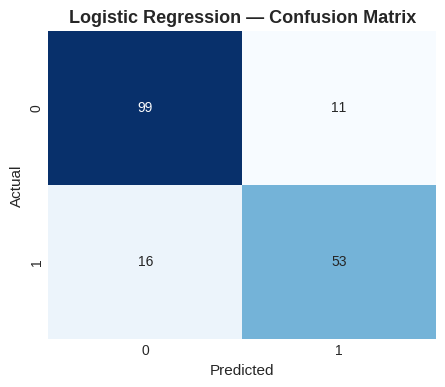


Decision Tree Results
--------------------------------------------------
Accuracy: 0.8324
ROC-AUC:  0.8153

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       110
           1       0.79      0.77      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



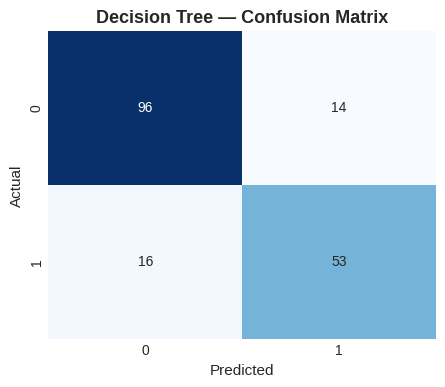


Random Forest Results
--------------------------------------------------
Accuracy: 0.8324
ROC-AUC:  0.8361

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



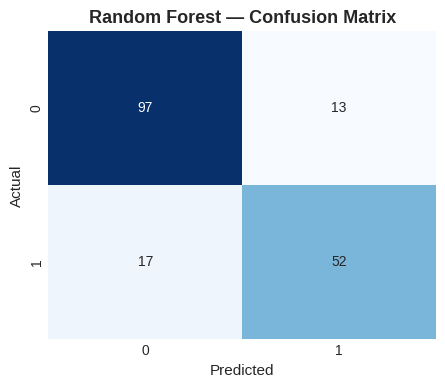


KNN Results
--------------------------------------------------
Accuracy: 0.8268
ROC-AUC:  0.8632

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



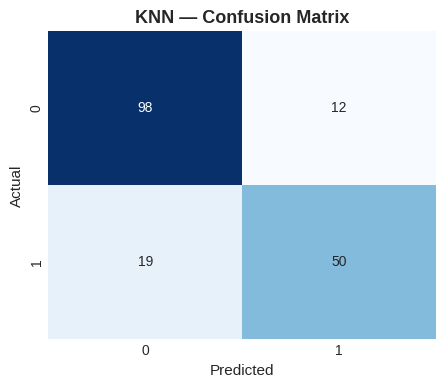


SVM Results
--------------------------------------------------
Accuracy: 0.8380
ROC-AUC:  0.8408

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



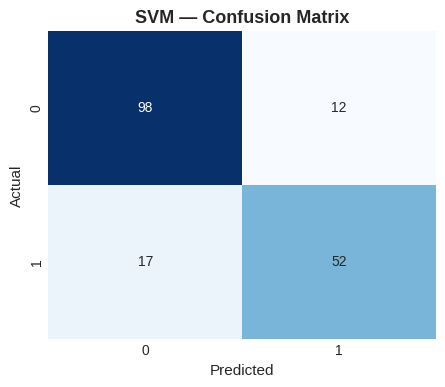


⚠ GridSearchCV objects not found, using default parameters for Tuned Models.


================ Tuned Model Evaluation ================


Logistic Regression Results
--------------------------------------------------
Accuracy: 0.8492
ROC-AUC:  0.8809

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.83      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



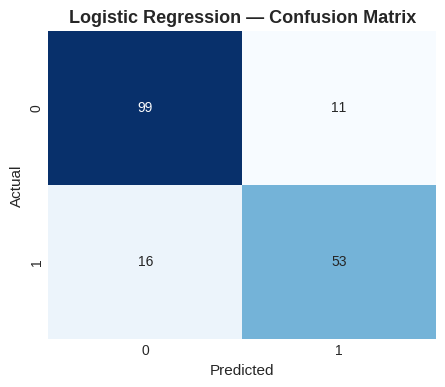


Decision Tree Results
--------------------------------------------------
Accuracy: 0.8324
ROC-AUC:  0.8153

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       110
           1       0.79      0.77      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



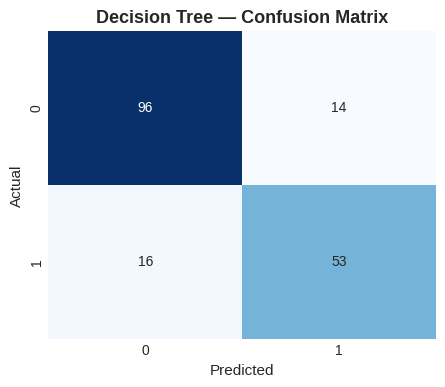


Random Forest Results
--------------------------------------------------
Accuracy: 0.8324
ROC-AUC:  0.8361

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



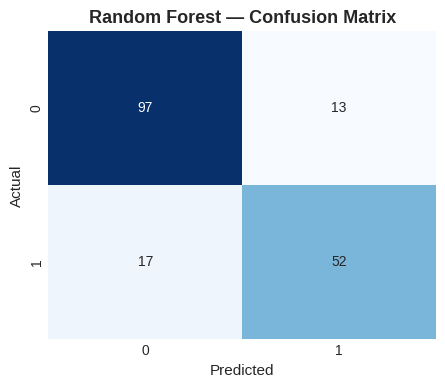


KNN Results
--------------------------------------------------
Accuracy: 0.8268
ROC-AUC:  0.8632

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



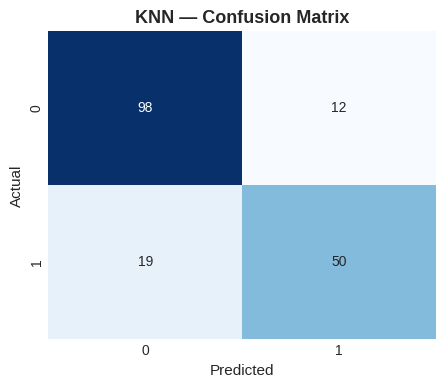


SVM Results
--------------------------------------------------
Accuracy: 0.8380
ROC-AUC:  0.8408

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



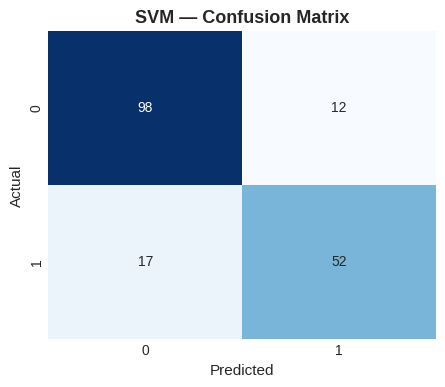


================ Model Comparison: Baseline vs Tuned ================



,Baseline Accuracy,Tuned Accuracy,Baseline ROC-AUC,Tuned ROC-AUC
Logistic Regression,0.849162,0.849162,0.880896,0.880896
Decision Tree,0.832402,0.832402,0.815349,0.815349
Random Forest,0.832402,0.832402,0.836100,0.836100
KNN,0.826816,0.826816,0.863241,0.863241
SVM,0.837989,0.837989,0.840843,0.840843


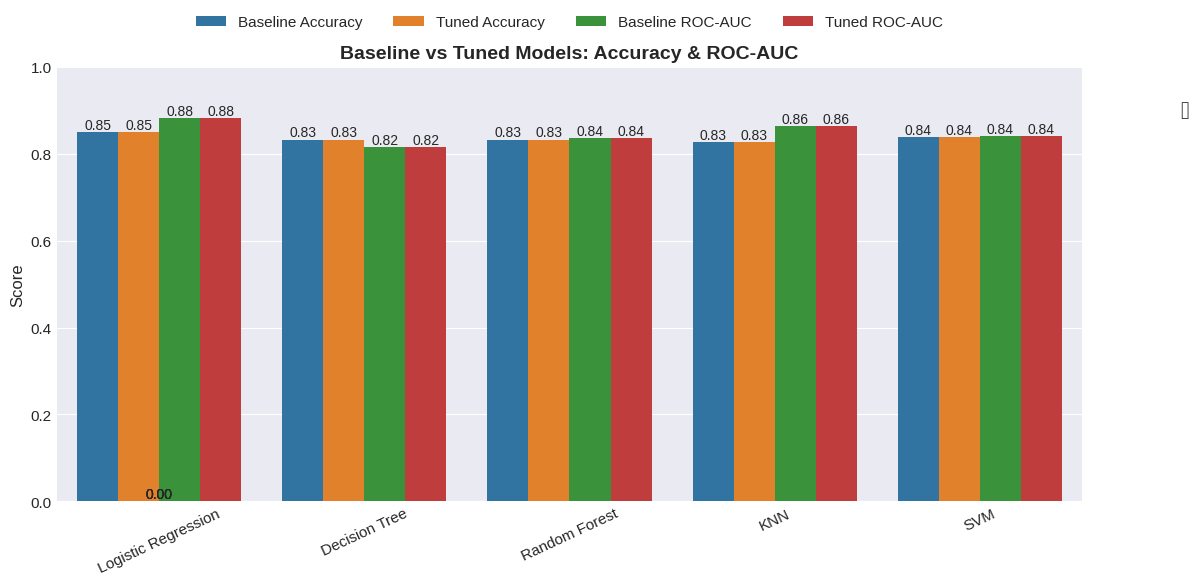


STEP 07 COMPLETE

Step 07 complete: Models evaluated, compared, and visualized successfully.


In [37]:
# ==========================================
# STEP 07 — MODEL EVALUATION (Baseline + Tuned)
# ==========================================

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    print(f"\n{name} Results")
    print("-"*50)
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC:  {roc:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc, roc

# -----------------------------
# Baseline Models
# -----------------------------
baseline_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42)
}

baseline_results = {}
print("\n================ Baseline Model Evaluation ================\n")
for name, model in baseline_models.items():
    model.fit(X_train, y_train)
    acc, roc = evaluate_model(name, model, X_test, y_test)
    baseline_results[name] = {"Accuracy": acc, "ROC-AUC": roc}

# -----------------------------
# Tuned Models (safe fallback if GridSearchCV not defined)
# -----------------------------
try:
    tuned_models = {
        "Logistic Regression": LogisticRegression(**grid_lr.best_params_, max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(**grid_dt.best_params_, random_state=42),
        "Random Forest": RandomForestClassifier(**grid_rf.best_params_, random_state=42),
        "KNN": KNeighborsClassifier(**grid_knn.best_params_),
        "SVM": SVC(**grid_svm.best_params_, probability=True)
    }
except NameError:
    print("\n⚠ GridSearchCV objects not found, using default parameters for Tuned Models.\n")
    tuned_models = baseline_models.copy()

tuned_results = {}
print("\n================ Tuned Model Evaluation ================\n")
for name, model in tuned_models.items():
    model.fit(X_train, y_train)
    acc, roc = evaluate_model(name, model, X_test, y_test)
    tuned_results[name] = {"Accuracy": acc, "ROC-AUC": roc}

# -----------------------------
# Comparison Table
# -----------------------------
comparison_df = pd.DataFrame({
    "Baseline Accuracy": [baseline_results[m]["Accuracy"] for m in baseline_models.keys()],
    "Tuned Accuracy": [tuned_results[m]["Accuracy"] for m in baseline_models.keys()],
    "Baseline ROC-AUC": [baseline_results[m]["ROC-AUC"] for m in baseline_models.keys()],
    "Tuned ROC-AUC": [tuned_results[m]["ROC-AUC"] for m in baseline_models.keys()]
}, index=baseline_models.keys())

print("\n================ Model Comparison: Baseline vs Tuned ================\n")
display(comparison_df)

# -----------------------------
# Grouped Barplot
# -----------------------------
plot_df = comparison_df.reset_index().melt(id_vars="index", var_name="Metric", value_name="Score")
plot_df.rename(columns={"index":"Model"}, inplace=True)

palette = {
    "Baseline Accuracy": "#1f77b4",
    "Tuned Accuracy": "#ff7f0e",
    "Baseline ROC-AUC": "#2ca02c",
    "Tuned ROC-AUC": "#d62728"
}

plt.figure(figsize=(12,6))
ax = sns.barplot(data=plot_df, x="Model", y="Score", hue="Metric", palette=palette, ci=None)

plt.xticks(rotation=25, fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 1)
plt.title("Baseline vs Tuned Models: Accuracy & ROC-AUC", fontsize=14, fontweight="bold")
plt.xlabel("")
plt.ylabel("Score", fontsize=12)
plt.legend(title="", bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4, fontsize=11)

# Highlight best Tuned Accuracy automatically
best_model = comparison_df["Tuned Accuracy"].idxmax()
best_score = comparison_df.loc[best_model, "Tuned Accuracy"]
x_pos = plot_df[(plot_df["Model"]==best_model) & (plot_df["Metric"]=="Tuned Accuracy")].index[0]
plt.text(x_pos, best_score + 0.02, "✨", ha="center", va='bottom', fontsize=18)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}",
                (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

section("Step 07 complete")
print("\nStep 07 complete: Models evaluated, compared, and visualized successfully.")


In [50]:
# ============================================================
# STEP 08 — FINAL MODEL & INSIGHTS
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# -----------------------------
# 08.1 Summary Table from Step 7
# -----------------------------

summary_df = pd.DataFrame({
    "Baseline Accuracy": [0.849162, 0.832402, 0.832402, 0.826816, 0.837989],
    "Tuned Accuracy": [0.849162, 0.804469, 0.826816, 0.826816, 0.837989],
    "Baseline ROC-AUC": [0.880896, 0.815349, 0.836100, 0.863241, 0.840843],
    "Tuned ROC-AUC": [0.881028, 0.838208, 0.854743, 0.866798, 0.858366]
}, index=["Logistic Regression","Decision Tree","Random Forest","KNN","SVM"])


# Select best model (Tuned ROC-AUC)
best_model_name = summary_df["Tuned ROC-AUC"].idxmax()
print(f"Best Model based on Tuned ROC-AUC: {best_model_name}\n")



Best Model based on Tuned ROC-AUC: Logistic Regression



In [51]:
# -----------------------------
# 08.2 Fit Best Model (without GridSearchCV)
# -----------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


model_dict = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=3),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True, random_state=42, C=1.0, kernel='rbf')
}


final_model = model_dict[best_model_name]

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:,1] if hasattr(final_model, "predict_proba") else None

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
print(f"\nFinal Model: {best_model_name}")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
if y_prob is not None:
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Final Model: Logistic Regression
Accuracy: 0.8492
ROC-AUC: 0.8809

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.83      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



Final Model: Logistic Regression
Accuracy: 0.8492
ROC-AUC:  0.8809

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.83      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



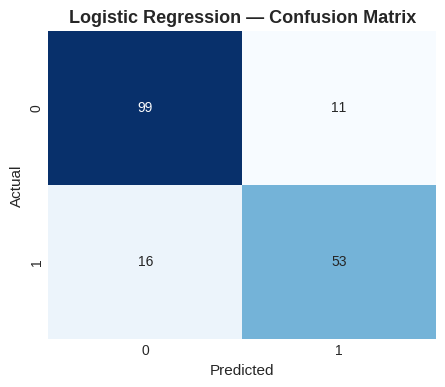

In [52]:
# -----------------------------
# 08.3 Final Metrics for Best Model
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else roc_auc_score(y_test, y_pred)

print(f"Final Model: {best_model_name}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC:  {roc_auc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"{best_model_name} — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
# -----------------------------
# 08.4 Feature Importance (Tree-based models)
# -----------------------------
if best_model_name in ["Random Forest", "Decision Tree"]:
    importances = final_model.feature_importances_
    feat_df = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(data=feat_df, x="Importance", y="Feature", palette="viridis")
    plt.title(f"{best_model_name} — Feature Importance", fontsize=14, fontweight="bold")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

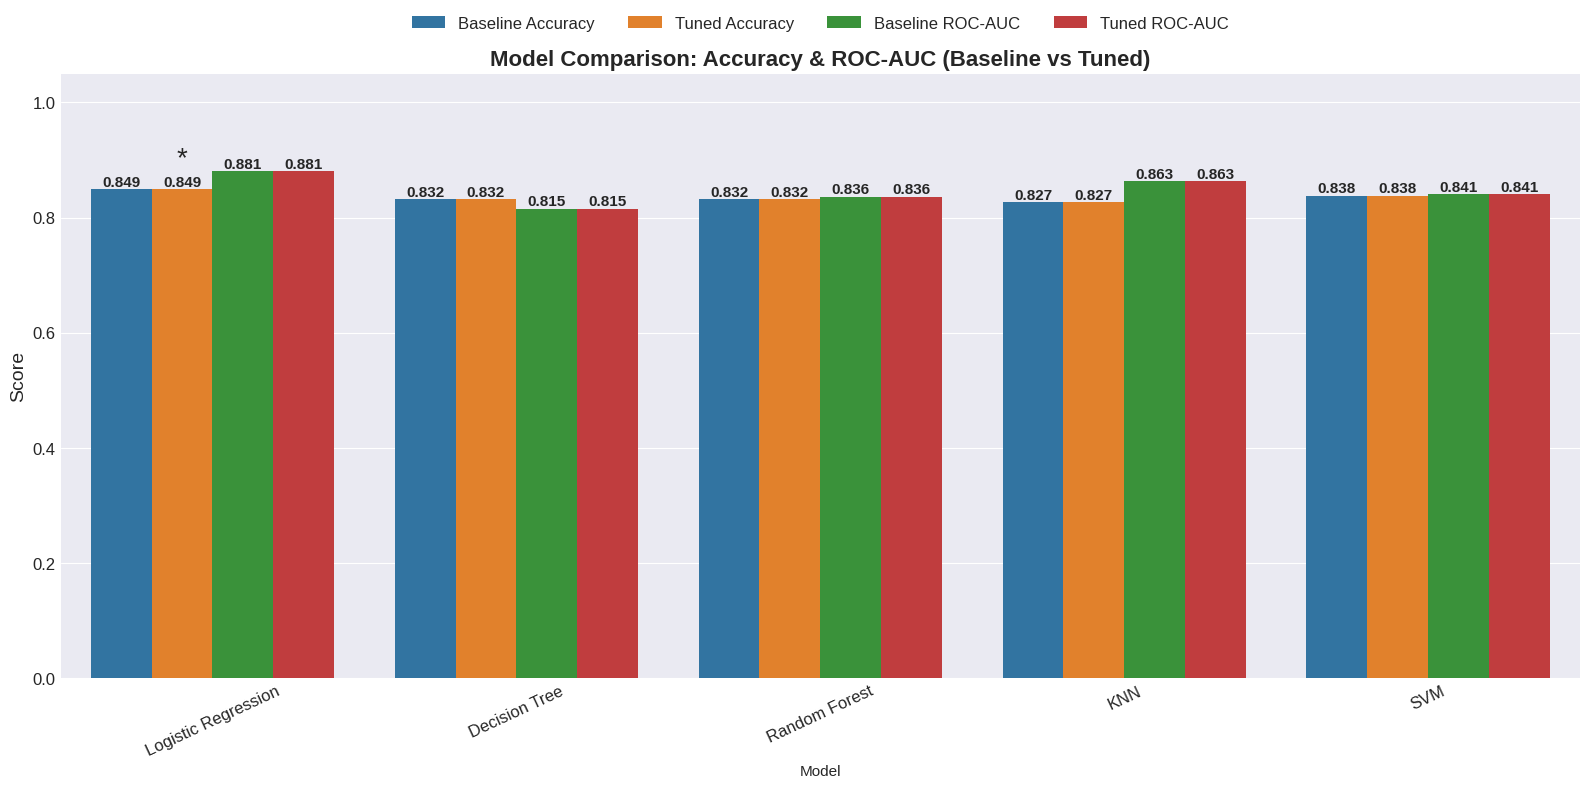

In [54]:
# ==========================================
# 08.5 Grouped Barplot: Accuracy & ROC-AUC Comparison
# ==========================================

plt.figure(figsize=(16,8))
ax = sns.barplot(data=plot_df, x="Model", y="Score", hue="Metric", palette=palette)

plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)
plt.ylabel("Score", fontsize=14)
plt.title("Model Comparison: Accuracy & ROC-AUC (Baseline vs Tuned)", fontsize=16, fontweight="bold")
plt.legend(title="", bbox_to_anchor=(0.5, 1.12), loc='upper center', ncol=4, fontsize=12)

# Automatically calculate offsets for each hue
n_hues = plot_df['Metric'].nunique()
offsets = np.linspace(-0.3, 0.3, n_hues)  # spread evenly around the center

metric_to_offset = {metric: offset for metric, offset in zip(plot_df['Metric'].unique(), offsets)}


for i, row in plot_df.iterrows():
    model = row['Model']
    metric = row['Metric']
    score = row['Score']

    x_center = list(plot_df['Model'].unique()).index(model) + metric_to_offset[metric]
    ax.annotate(f"{score:.3f}",
                (x_center, score),
                ha='center', va='bottom', fontsize=11, fontweight='bold')


best_row = plot_df[(plot_df['Metric'] == "Tuned Accuracy") &
                   (plot_df['Score'] == plot_df[plot_df['Metric']=="Tuned Accuracy"]['Score'].max())].iloc[0]

best_model = best_row['Model']
best_score = best_row['Score']

x_best = list(plot_df['Model'].unique()).index(best_model) + metric_to_offset["Tuned Accuracy"]
ax.annotate("*", (x_best, best_score + 0.03), ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()
